In [9]:
import torchvision
from torchvision import transforms
import torch
from torch import no_grad

In [8]:
import requests


In [7]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


In [10]:
from IPython.display import Image
%matplotlib inline

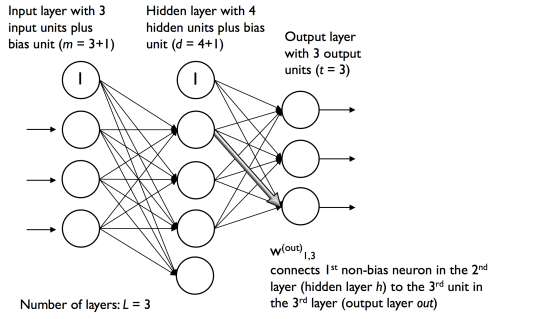

In [11]:
Image(filename='D:\phani\pic3.png',width=400)

In [12]:
from random import random
from numpy import array
from numpy import cumsum
def get_sequence(n_timesteps):
 
 x=array([random() for _ in range(n_timesteps)])
 limit=n_timesteps/4.0
 y=array([0 if x<limit else 1 for x in cumsum(x)])
 
 return x,y
x,y=get_sequence(10)
print('Input Sequence-x:\n',x)
print()
print('Output-y:\n',y)

Input Sequence-x:
 [0.97520843 0.10207272 0.09937502 0.46979075 0.57830662 0.22748393
 0.68440653 0.65698959 0.8360584  0.49772577]

Output-y:
 [0 0 0 0 0 0 1 1 1 1]


In [13]:
#Generate Multiple Sequences
def get_sequences(n_sequences,n_timesteps):
    seq_x,seq_y=list(),list()
 
    for _ in range(n_sequences):
        x,y=get_sequence(n_timesteps)
        seq_x.append(x)
        seq_y.append(y)
 
    seq_x=array(seq_x).reshape(n_sequences,n_timesteps,1)
    seq_y=array(seq_y).reshape(n_sequences,n_timesteps,1)
    return seq_x,seq_y 


In [14]:
get_sequences(2,10)

(array([[[0.04955381],
         [0.66237671],
         [0.43670265],
         [0.21451298],
         [0.84930541],
         [0.36463111],
         [0.80348117],
         [0.83315802],
         [0.57093361],
         [0.69944471]],
 
        [[0.10054916],
         [0.935406  ],
         [0.04240859],
         [0.08962353],
         [0.01882679],
         [0.22055686],
         [0.58675171],
         [0.018071  ],
         [0.65103328],
         [0.27456129]]]),
 array([[[0],
         [0],
         [0],
         [0],
         [0],
         [1],
         [1],
         [1],
         [1],
         [1]],
 
        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1],
         [1]]]))

In [15]:
n_timesteps=10

In [16]:
from keras.models import Sequential
from keras.layers import Bidirectional
from keras.layers import TimeDistributed
from keras.layers import Dense,LSTM
model=Sequential()
#bidirectional layer
model.add(Bidirectional(LSTM(50,return_sequences=True),input_shape=(n_timesteps,1)))
#Output layer - time distributed layer
model.add(TimeDistributed(Dense(1,activation='sigmoid')))
#compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 10, 100)           20800     
 al)                                                             
                                                                 
 time_distributed (TimeDist  (None, 10, 1)             101       
 ributed)                                                        
                                                                 
Total params: 20901 (81.64 KB)
Trainable params: 20901 (81.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [17]:
#train the model
x,y=get_sequences(50000,n_timesteps)
model.fit(x,y,epochs=10,batch_size=10)


Epoch 1/10
5000/5000 [==============================] - 22s 4ms/step - loss: 0.0521 - accuracy: 0.9818
Epoch 2/10
5000/5000 [==============================] - 18s 4ms/step - loss: 0.0214 - accuracy: 0.9926
Epoch 3/10
5000/5000 [==============================] - 19s 4ms/step - loss: 0.0169 - accuracy: 0.9939
Epoch 4/10
5000/5000 [==============================] - 20s 4ms/step - loss: 0.0148 - accuracy: 0.9945
Epoch 5/10
5000/5000 [==============================] - 19s 4ms/step - loss: 0.0136 - accuracy: 0.9949
Epoch 6/10
5000/5000 [==============================] - 19s 4ms/step - loss: 0.0125 - accuracy: 0.9951
Epoch 7/10
5000/5000 [==============================] - 20s 4ms/step - loss: 0.0116 - accuracy: 0.9956
Epoch 8/10
5000/5000 [==============================] - 20s 4ms/step - loss: 0.0109 - accuracy: 0.9958
Epoch 9/10
5000/5000 [==============================] - 20s 4ms/step - loss: 0.0106 - accuracy: 0.9959
Epoch 10/10
5000/5000 [==============================] - 20s 4ms/step - l

In [18]:

#Evaluate the model
x,y=get_sequences(100,n_timesteps)
loss,acc=model.evaluate(x,y,verbose=1)
print()
print('Loss: %f, Accuracy: %f'%(loss,acc*100))

4/4 [==============================] - 1s 4ms/step - loss: 0.0079 - accuracy: 0.9970

Loss: 0.007919, Accuracy: 99.699998


In [19]:
# Make prediction
import numpy as np
for _ in range(10):
    x,y=get_sequences(1,n_timesteps)
    yhat=model.predict(x,verbose=0)
    exp,pred=y.reshape(n_timesteps),yhat.reshape(n_timesteps)
 
    print('y=%s, yhat=%s,correct=%s' % (exp,pred,np.array_equal(exp,pred)))


y=[0 0 0 0 0 0 1 1 1 1], yhat=[3.7121922e-15 5.6063837e-18 2.0088647e-17 1.5108565e-17 2.5285014e-09
 2.9409468e-11 9.9993956e-01 9.9999988e-01 1.0000000e+00 1.0000000e+00],correct=False
y=[0 0 0 0 1 1 1 1 1 1], yhat=[8.6530707e-13 5.5288875e-17 7.5606486e-11 3.8511545e-04 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00],correct=False
y=[0 0 0 0 0 1 1 1 1 1], yhat=[4.1921439e-15 2.8572863e-17 4.8349646e-16 2.9495407e-06 2.2790628e-06
 9.9714375e-01 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00],correct=False
y=[0 0 0 0 1 1 1 1 1 1], yhat=[3.3794449e-13 9.3072793e-15 8.2041570e-15 2.3005786e-03 9.9902636e-01
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00],correct=False
y=[0 0 0 0 1 1 1 1 1 1], yhat=[7.4219065e-16 1.5250956e-17 1.2244575e-18 5.7551552e-10 9.9400854e-01
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00],correct=False
y=[0 0 0 0 1 1 1 1 1 1], yhat=[4.1332026e-14 3.8379384e-17 9.2855

In [20]:
#train the model
x,y=get_sequences(50000,n_timesteps)
model.fit(x,y,epochs=1,batch_size=10)


5000/5000 [==============================] - 19s 4ms/step - loss: 0.0099 - accuracy: 0.9960


In [21]:
# Make prediction
import numpy as np
for _ in range(10):
    x,y=get_sequences(1,n_timesteps)
    ypred=model.predict(x,verbose=0)
    actual,pred=y.reshape(n_timesteps),ypred.reshape(n_timesteps)
 
    print('y=%s, ypred=%s,correct=%s' % (actual,pred,np.array_equal(actual,ypred)))


y=[0 0 0 0 1 1 1 1 1 1], ypred=[2.0815558e-16 7.7971593e-17 9.7761832e-15 9.5600486e-02 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00],correct=False
y=[0 0 0 0 0 1 1 1 1 1], ypred=[4.7582272e-12 4.4646888e-17 1.2971591e-17 2.9697238e-18 6.5068519e-12
 9.9999303e-01 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00],correct=False
y=[0 0 0 0 1 1 1 1 1 1], ypred=[4.6149841e-11 1.2374610e-16 2.1225926e-18 8.5389926e-09 9.9999964e-01
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00],correct=False
y=[0 0 0 0 0 1 1 1 1 1], ypred=[4.4849828e-18 9.5080110e-18 4.3172692e-16 1.9841161e-14 4.9880233e-09
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00],correct=False
y=[0 0 0 1 1 1 1 1 1 1], ypred=[1.0955597e-10 1.7186650e-11 1.5098960e-11 9.9584091e-01 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00],correct=False
y=[0 0 0 1 1 1 1 1 1 1], ypred=[2.93371937e-15 1.43049825e-1